<IPython.core.display.Javascript object>


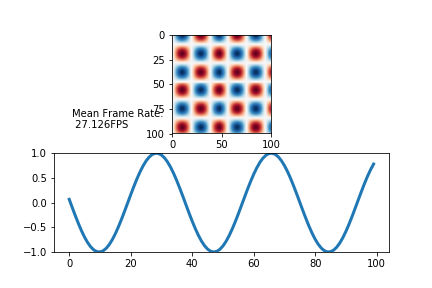

C:\Users\lodew\AppData\Local\Continuum\anaconda3\envs\kafka\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


In [12]:
%matplotlib notebook

import time
from matplotlib import pyplot as plt
import numpy as np



def live_update_demo(blit = False):
    x = np.linspace(0,50., num=100)
    X,Y = np.meshgrid(x,x)
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    fig.canvas.draw()   # note that the first draw comes before setting data 

    h1 = ax1.imshow(X, vmin=-1, vmax=1, interpolation="None", cmap="RdBu")

    h2, = ax2.plot(x, lw=3)
    text = ax2.text(0.8,1.5, "")
    ax2.set_ylim([-1,1])


    if blit:
        # cache the background
        axbackground = fig.canvas.copy_from_bbox(ax1.bbox)
        ax2background = fig.canvas.copy_from_bbox(ax2.bbox)

    t_start = time.time()
    k=0.
    for i in np.arange(1000):
        h1.set_data(np.sin(X/3.+k)*np.cos(Y/3.+k))
        h2.set_ydata(np.sin(x/3.+k))
        tx = 'Mean Frame Rate:\n {fps:.3f}FPS'.format(fps= ((i+1) / (time.time() - t_start)) ) 
        text.set_text(tx)
        #print tx
        k+=0.11
        if blit:
            # restore background
            fig.canvas.restore_region(axbackground)
            fig.canvas.restore_region(ax2background)

            # redraw just the points
            ax1.draw_artist(h1)
            ax2.draw_artist(h2)

            # fill in the axes rectangle
            fig.canvas.blit(ax1.bbox)
            fig.canvas.blit(ax2.bbox)
            # in this post http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
            # it is mentionned that blit causes strong memory leakage. 
            # however, I did not observe that.

        else:
            # redraw everything
            fig.canvas.draw()
            fig.canvas.flush_events()


        plt.pause(0.000000000001) 
        #plt.pause calls canvas.draw(), as can be read here:
        #http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
        #however with Qt4 (and TkAgg??) this is needed. It seems,using a different backend, 
        #one can avoid plt.pause() and gain even more speed.


# live_update_demo(True) # 28 fps
live_update_demo(False) # 18 fps